## Basic Housing Model

This is a basic housing model based on features that the average person in Ames Iowa should be able to find about their house.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

### Modeling
For the models I am going to try a Lasso, Ridge, and OLS Regression set in order to see which gives <br>
the best Accuracy, R-Squared and Mean Squared Log Error scores.

In [5]:
houses = pd.read_csv('./datasets/cleanedtrain.csv')
seed = 42

In [7]:
X = houses.drop(columns = ['saleprice'])
y = houses['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.50, random_state = seed)

### Ordinary Least Squares

In [64]:
scaler = StandardScaler()
lr = LinearRegression().fit(X_train, y_train) 
pred = lr.predict(X_test)
scores = cross_val_score(lr, X_test, y_test, cv=5)
df = pd.DataFrame([lr.coef_], columns = X.columns, index = None)

In [33]:
print(f'Cross Evaluation Score = {scores.mean()} +- {scores.std()*2}')
print(f'R-Squared score        = {metrics.r2_score(y_test, pred)}')
print(f'Mean Squared Error     = {metrics.mean_squared_error(abs(y_test), abs(pred)) ** .5}')

Cross Evaluation Score = 0.8606008120377192 +- 0.02969049949641597
R-Squared score        = 0.8565279513228642
Mean Squared Error     = 28331.687598739798


### Data Scaling

In [28]:
Z_train = scaler.fit_transform(X_train)
Z_test = scaler.fit_transform(X_test)

### Ridge

In [29]:
r_alphas = np.logspace(0, 5, 100)
ridge = RidgeCV(alphas=r_alphas, scoring = 'r2', cv= 5).fit(Z_train, y_train);
ridge_pred = ridge.predict(X_test)
ridge_scores = cross_val_score(ridge, Z_train, y_train, cv = 3)

In [34]:
print(f'Cross Evaluation Score = {ridge_scores.mean()} +- {ridge_scores.std()*2}')
print(f'R-Squared score        = {metrics.r2_score(y_test, ridge_pred)}')
print(f'Mean Squared Error     = {metrics.mean_squared_error(y_test, ridge_pred) ** .5}')

Cross Evaluation Score = 0.8348384286054652 +- 0.022680146884111064
R-Squared score        = 0.8606365221304044
Mean Squared Error     = 28263.8266189584


### Lasso

In [31]:
l_alphas = (.1, 3, 100)
lasso = LassoCV(alphas = l_alphas, cv = 5, max_iter = 2000).fit(Z_train, y_train)
lasso_scores = cross_val_score(lasso, Z_test, y_test, cv = 5)
lasso_pred = lasso.predict(Z_test)

In [35]:
print(f'Cross Evaluation Score = {lasso_scores.mean()} +- {lasso_scores.std()*2}')
print(f'R-Squared score        = {metrics.r2_score(y_test, lasso_pred)}')
print(f'Mean Squared Error     = {metrics.mean_squared_error(y_test, lasso_pred) ** .5}')

Cross Evaluation Score = 0.8616504790415137 +- 0.025476528775354713
R-Squared score        = 0.861846799040759
Mean Squared Error     = 28140.83296321337


### Scores
#### OLS<br>
- Cross Evaluation Score = 0.8606008120377192 +- 0.02969049949641597
- R-Squared score        = 0.8565279513228642
- Mean Error             = 28331.687598739798

#### Ridge <br>
- Cross Evaluation Score = 0.8348384286054652 +- 0.022680146884111064
- R-Squared score        = 0.8606365221304044
- Mean Error             = 8263.8266189584

#### Lasso <br>
- Cross Evaluation Score = 0.8616504790415137 +- 0.025476528775354713
- R-Squared score        = 0.861846799040759
- Mean Error             = 28140.83296321337
<br>

### Best Model for Dataset
Lasso was just slightly better in Accuracy, R-Squared, and Mean Error enough that they may all be <br>
Somewhat equal tests for this dataset.<br>

#### Cross Evaluation Board
Accuracy for this dataset was within reason for what the project set out to do which was to allow the layman <br>
to get a general estimate of the value of their house before going to market in Ames Iowa. eighty three percent <br>
accuracy would give a very clear estimate to any potential seller of how much they should be reasonably looking at <br>
when they start getting ready to sell their house. 

#### R-Squared
The line is somewhat well fitted to the data as our reasonable R-Squared score tells us. I think to improve any of the <br>
scores for this dataset I would start searching for other simple things that potential sellers would be able to evaluate<br>
before they start the selling process in order to get slightly more information to fit the line that much better. 

#### Mean Error 
The mean squared error is relatively even across the board so there don't appear to be any major outliers affecting <br> 
our dataset in a massively negative way

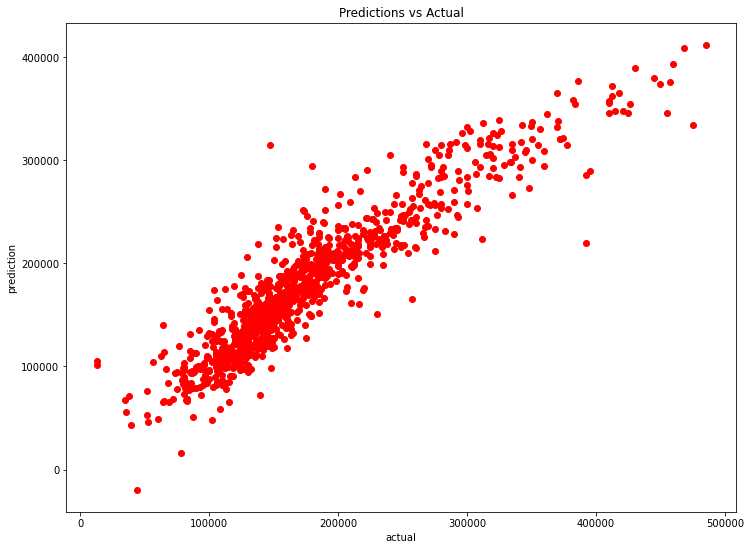

In [36]:
plt.figure(figsize = [12, 9])
plt.scatter(y_test, ridge_pred, c = 'red')
plt.title('Predictions vs Actual')
plt.ylabel('prediction')
plt.xlabel('actual');

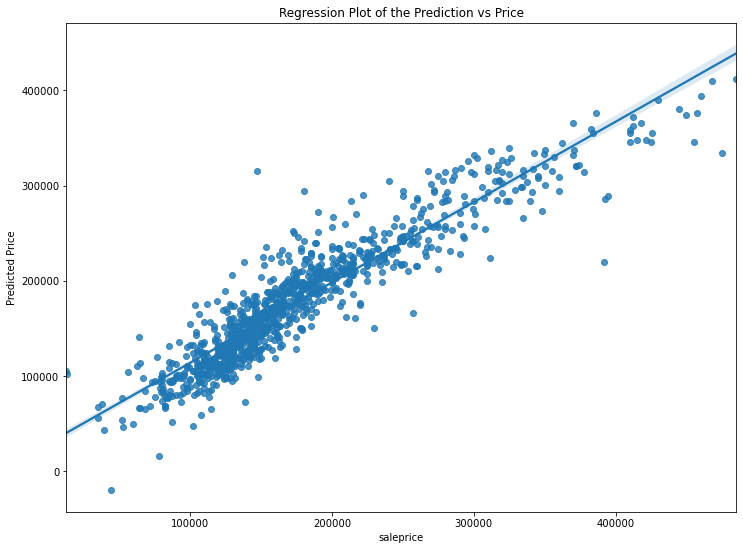

In [37]:
plt.figure(figsize = [12, 9])
sns.regplot(y_test, ridge_pred, X_test, fit_reg = True)
plt.title('Regression Plot of the Prediction vs Price')
plt.ylabel('Predicted Price');

### Problems with Prediction
- The model throws a fair amount of higher end values in order to optimize accuracy for lower predictions

## Conclusion
The model works pretty well for the average person if a seller lives in Ames Iowa and they want an estimate of the <br>
price of their house without having to talk to a real estate agent I would recommend they use the model. <br> <br>

There is some limitation to the data There appear to be a few outliers and the model falls apart considerably after <br>
houses start to cost more than five hundred thousand dollars probably due to a lack of datapoints that fall within <br>
that range. <br><br>
That being said the model could be improved considerably with more features, and more data overall. <br> <br>
